In [63]:
import warnings
warnings.filterwarnings("ignore")
import modulesForCalibration as mfc
import matplotlib.pyplot as plt

#import readPlotOptionSurface_granular_k2_5 as marketSurface
import readPlotOptionSurfaceedited as marketSurface
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib import cm
import cmath
import math
from scipy.optimize import fmin


import plotly.plotly as py
import plotly.graph_objs as go

# This report reflects the work of Lisa He, Alban Zapke, and Naijia Yao, for the project of volatility surface in Computational Methods in Finance with Prof. Hirsa.

## APPL

###  We set up Grid for Model Prices as provided in readPlotOptionSurface.py provided by Prof. Hirsa

### deltaK = 5 & deltaTau = 1/52

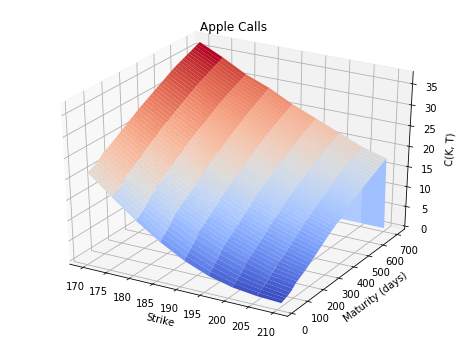

In [3]:
maturities, strikes, marketPrices = marketSurface.readNPlot()

In [4]:
maturities_years = maturities/365

# I. Model Prices

### Global Parameters

In [5]:
# Contract Parameters
S0 = 190
K = 190
k = np.log(K)
# risk free rate
r = 0.0245
# dividend rate
q = 0.005

# Parameters
alpha = 1.5                       # Why?
eta = 0.2

n = 12
N = 2**n

# step-size in log strike space  --> FFT constraint
#lda = (2*np.pi/N)/eta

# Choice of beta
#beta = np.log(S0)-N*lda/2
# beta = np.log(K)

* Grid for Model Prices was set up in readPlotOptionSurface

## 1. Finding a starting point; code provided as in exampleCalibration_FindingStartingPoint.py by Prof. Hirsa

In [6]:
iArray = []                             # The alphas (0,1) which are plotted agains RMSE -> calling it i instead here
rmseArray = []
rmseMin = 1e10                          # Random; in order to have an error to start with

### Model specific parameters:

#### Heston 

In [7]:
model = 'VGSSD'

#set 1: promising starting point
params1 = (1.0, 0.02, 0.05, 0.4)
params2 = (3.0, 0.06, 0.10, 0.6)

In [8]:
lenT = len(maturities_years)
lenK = len(strikes)
modelPrices = np.zeros((lenT, lenK))

In [9]:
modelPrices.shape == marketPrices.shape

True

In [10]:
marketPrices.shape


(98, 9)

In [11]:
iArray = []
rmseArray=[]
for i in mfc.myRange(0.0, 1.0, 0.05):
    
    params = i*np.array(params1) + (1.0-i)*np.array(params2)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

In [12]:
len(rmseArray) == len(iArray)
print(len(rmseArray))
print(len(iArray))
#print(rmseArray)
#print(iArray)

20
20


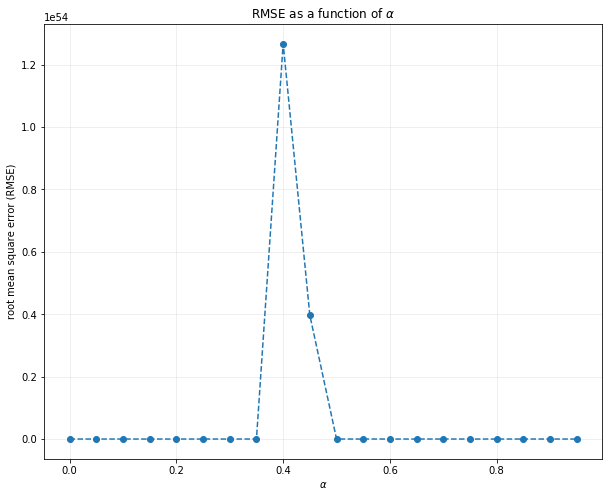

93.67005725836512
[1.1    0.022  0.0525 0.41  ]


In [13]:
fig = plt.figure(figsize=(10,8))
plt.plot(iArray, rmseArray, 'o--')
plt.grid(alpha=0.25)
plt.xlabel('$\\alpha$')
plt.ylabel('root mean square error (RMSE)')
plt.title('RMSE as a function of $\\alpha$')
plt.savefig('startingPoint4.png')
plt.show()

print(rmseMin)
print(optimParams)

In [14]:
# Starting point Parameters 
sigma  = 1.1 
nu     = 0.022
theta  = 0.0525
gamma  = 0.41

## 2. Optimization of Parameter Set

#### - Objective Function -

In [15]:
def objFunc(v, x0, x1, x2):
    # Paraboloid centered on (x, y), with scale factors (10, 20) and minimum 30
    return 10.0*(v[0]-x0)**2 + 20.0*(v[1]-x1)**2 + 30.0*(v[2]-x2)**2 + 40.0

In [16]:
lenT = len(maturities)
lenK = len(strikes)

#### A) Brute Force Algorithm 

In [18]:
# maturities, strikes, marketPrices = marketSurface.readNPlot()

#==========================================
# Grid Search around the starting point
#------------------------------------------
# [1.1    0.022  0.0525 0.41  ]
ind_iter = 1
rmseMin = 1.0e6

for kappa in mfc.myRange(0.6,1.6,0.5):
    for theta in mfc.myRange(0.012,0.032,0.01):
        for sig in mfc.myRange(0.0425,0.0625,0.01):
            for rho in mfc.myRange(0.31,0.51,0.1):
                
                params = []
                params.append(kappa)
                params.append(theta)
                params.append(sig)
                params.append(rho)
                
                    
                print('i = ' + str(ind_iter))
                ind_iter += 1
                print(params)
                rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
                    
                if (rmse < rmseMin):
                    rmseMin = rmse
                    params2 = params
                    print('\nnew min found')
                    print(rmseMin)
                    print(params2)
                    print('')

print('\nSolution of grid search:')                        
print(params2)
print('Optimal rmse = ' + str(rmseMin))

i = 1
[0.6, 0.012, 0.0425, 0.31]

new min found
43.48973715786752
[0.6, 0.012, 0.0425, 0.31]

i = 2
[0.6, 0.012, 0.0425, 0.41000000000000003]
i = 3
[0.6, 0.012, 0.0425, 0.51]
i = 4
[0.6, 0.012, 0.052500000000000005, 0.31]
i = 5
[0.6, 0.012, 0.052500000000000005, 0.41000000000000003]
i = 6
[0.6, 0.012, 0.052500000000000005, 0.51]
i = 7
[0.6, 0.012, 0.0625, 0.31]
i = 8
[0.6, 0.012, 0.0625, 0.41000000000000003]
i = 9
[0.6, 0.012, 0.0625, 0.51]
i = 10
[0.6, 0.022, 0.0425, 0.31]
i = 11
[0.6, 0.022, 0.0425, 0.41000000000000003]
i = 12
[0.6, 0.022, 0.0425, 0.51]
i = 13
[0.6, 0.022, 0.052500000000000005, 0.31]
i = 14
[0.6, 0.022, 0.052500000000000005, 0.41000000000000003]
i = 15
[0.6, 0.022, 0.052500000000000005, 0.51]
i = 16
[0.6, 0.022, 0.0625, 0.31]
i = 17
[0.6, 0.022, 0.0625, 0.41000000000000003]
i = 18
[0.6, 0.022, 0.0625, 0.51]
i = 19
[0.6, 0.032, 0.0425, 0.31]
i = 20
[0.6, 0.032, 0.0425, 0.41000000000000003]
i = 21
[0.6, 0.032, 0.0425, 0.51]
i = 22
[0.6, 0.032, 0.052500000000000005, 0.3

In [ ]:
# Solution of grid search:
# [0.6, 0.012, 0.0425, 0.31]


#### - Market vs. Model Surface -

In [19]:
params2

[0.6, 0.012, 0.0425, 0.31]

In [20]:
lenT = len(maturities)
lenK = len(strikes)
modelPrices = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities_years[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params2, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices[i,j] = cT_km[0]

In [21]:
modelPrices.shape == marketPrices.shape

True

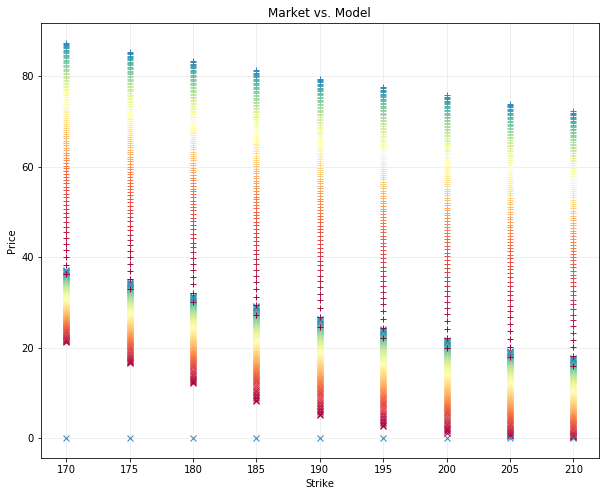

In [22]:
# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
for i in range(len(maturities)):
    plt.plot(strikes, marketPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
    
#plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model')
plt.savefig('MarketvsModel_GridSearch.png')
plt.show() 

#### B) Nelder Mead Algorithm  (Gradient-free) from exampleCalibration_NelderMead.py

In [23]:
#==========================================
# Nelder-Mead Simplex Algorithm -- fmin
#==========================================
# [1.1    0.022  0.0525 0.41  ]

params = [1.1 ,   0.022 , 0.0525, 0.41  ]

def callbackF(xi):
    global num_iter
    global arg
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)

num_iter = 1
#xopt, fopt, iters, funcalls, warnflag, allvecs = fmin(
t = fmin(
        mfc.eValue, 
        params, 
        args=arg, 
        xtol=1e-4,
        ftol=1e-4,
        maxiter=200,
        maxfun=400,
        callback=callbackF,
        disp=True,
        retall=False,
        full_output=True)

print('optimal params = ')
print(t[0])
print('f = ' + str(t[1]))

i = 1
x_i = [0.99       0.022825   0.05446875 0.425375  ]
f_i = 84.03894242679338
i = 2
x_i = [0.99       0.022825   0.05446875 0.425375  ]
f_i = 84.03894242679338
i = 3
x_i = [0.99       0.022825   0.05446875 0.425375  ]
f_i = 84.03894242679338
i = 4
x_i = [0.914375   0.02222344 0.05286914 0.43210156]
f_i = 76.87973297271901
i = 5
x_i = [0.77515625 0.02459102 0.053146   0.44867773]
f_i = 63.32721162309236
i = 6
x_i = [0.77515625 0.02459102 0.053146   0.44867773]
f_i = 63.32721162309236
i = 7
x_i = [0.57728516 0.02302642 0.05682074 0.48846655]
f_i = 43.67553716990602
i = 8
x_i = [0.32274902 0.02441498 0.05497536 0.49734772]
f_i = 17.98313507951752
i = 9
x_i = [0.32274902 0.02441498 0.05497536 0.49734772]
f_i = 17.98313507951752
i = 10
x_i = [-0.10690491  0.02605284  0.05537177  0.59387345]
f_i = 3.5457311228511936
i = 11
x_i = [-0.10690491  0.02605284  0.05537177  0.59387345]
f_i = 3.5457311228511936
i = 12
x_i = [-0.10690491  0.02605284  0.05537177  0.59387345]
f_i = 3.545731122851193

f_i = 2.775964848083269
i = 99
x_i = [ 0.19891472  0.07011511 -0.00704993  0.43910564]
f_i = 2.775964848083269
i = 100
x_i = [ 0.19891472  0.07011511 -0.00704993  0.43910564]
f_i = 2.775964848083269
i = 101
x_i = [ 0.19891472  0.07011511 -0.00704993  0.43910564]
f_i = 2.775964848083269
i = 102
x_i = [ 0.19891472  0.07011511 -0.00704993  0.43910564]
f_i = 2.775964848083269
i = 103
x_i = [ 0.19891472  0.07011511 -0.00704993  0.43910564]
f_i = 2.775964848083269
i = 104
x_i = [ 0.19891472  0.07011511 -0.00704993  0.43910564]
f_i = 2.775964848083269
i = 105
x_i = [ 0.19891472  0.07011511 -0.00704993  0.43910564]
f_i = 2.775964848083269
i = 106
x_i = [ 0.19891472  0.07011511 -0.00704993  0.43910564]
f_i = 2.775964848083269
i = 107
x_i = [ 0.19763877  0.06992632 -0.00579012  0.43426179]
f_i = 2.7758966418047155
i = 108
x_i = [ 0.19763877  0.06992632 -0.00579012  0.43426179]
f_i = 2.7758966418047155
i = 109
x_i = [ 0.19763877  0.06992632 -0.00579012  0.43426179]
f_i = 2.7758966418047155
i = 11

f_i = 2.775201696227828
i = 192
x_i = [ 0.19608679  0.01092683 -0.00515822  0.43463451]
f_i = 2.775201696227828
i = 193
x_i = [ 0.19569793  0.00347254 -0.00501094  0.43467426]
f_i = 2.775148688415092
i = 194
x_i = [ 0.19569793  0.00347254 -0.00501094  0.43467426]
f_i = 2.775148688415092
i = 195
x_i = [ 0.19569793  0.00347254 -0.00501094  0.43467426]
f_i = 2.775148688415092
i = 196
x_i = [ 0.19684075  0.00989708 -0.00596678  0.43474577]
f_i = 2.7750910450509485
i = 197
x_i = [ 0.19684075  0.00989708 -0.00596678  0.43474577]
f_i = 2.7750910450509485
i = 198
x_i = [ 0.1962264   0.00188337 -0.00550409  0.43405691]
f_i = 2.775067762705538
i = 199
x_i = [ 0.1962264   0.00188337 -0.00550409  0.43405691]
f_i = 2.775067762705538
optimal params = 
[ 0.1962264   0.00188337 -0.00550409  0.43405691]
f = 2.775067762705538


In [ ]:
# AT 199 ITERATIONS IT BLEW UP - MAX # OF ITERATIONS
#[ 0.1962264   0.00188337 -0.00550409  0.43405691]
#f = 2.775067762705538

#### - Market vs. Model Surface -

In [25]:
params_NM = [ 0.1962264,   0.00188337, -0.00550409  ,0.43405691]
lenT = len(maturities)
lenK = len(strikes)
modelPrices_MN = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities_years[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params_NM, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices_MN[i,j] = cT_km[0]

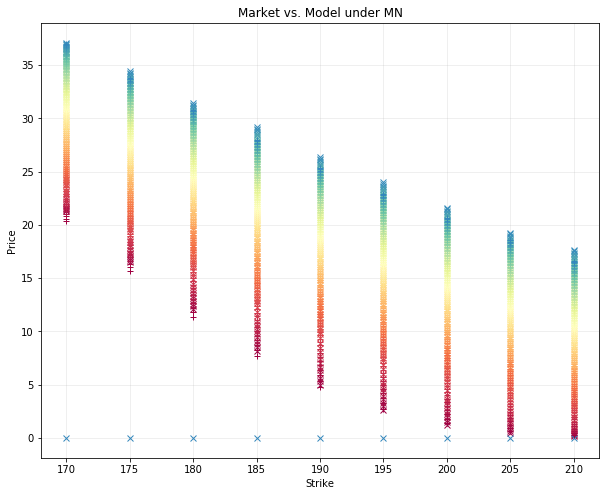

In [26]:
# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
for i in range(len(maturities)):
    plt.plot(strikes, marketPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices_MN[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
#plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model under MN')
#plt.savefig('MarketvsModel_NelderMead.png')
plt.show() 

#### C) BFGS Algorithm (Gradient-based) from exampleCalibration_BFGS.py

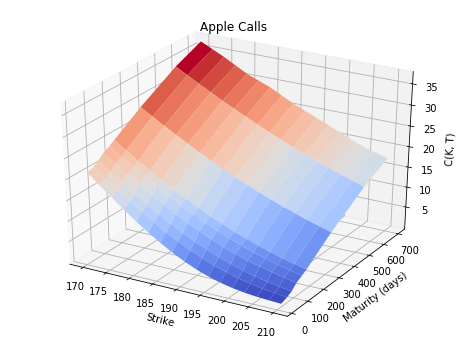

         Current function value: 93.670057
         Iterations: 0
         Function evaluations: 71
         Gradient evaluations: 11
optimal params = 
[1.1    0.022  0.0525 0.41  ]
f = 93.6700572583652


In [27]:
import warnings
warnings.filterwarnings("ignore")

import readPlotOptionSurface 
import modulesForCalibration as mfc

from scipy.optimize import fmin_bfgs

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

params = [1.1  ,  0.022 , 0.0525 ,0.41  ]

def callbackF(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)

num_iter = 1
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = fmin_bfgs(
        mfc.eValue,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF,
        maxiter=20,
        full_output=True, 
        retall=False)

print('optimal params = ')
print(xopt)
print('f = ' + str(fopt))


In [ ]:
#optimal params = 
#[1.1    0.022  0.0525 0.41  ]


In [28]:

        
params_BFGS = xopt
lenT = len(maturities)
lenK = len(strikes)
modelPrices_BFGS = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities_years[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params_BFGS, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices_BFGS[i,j] = cT_km[0]

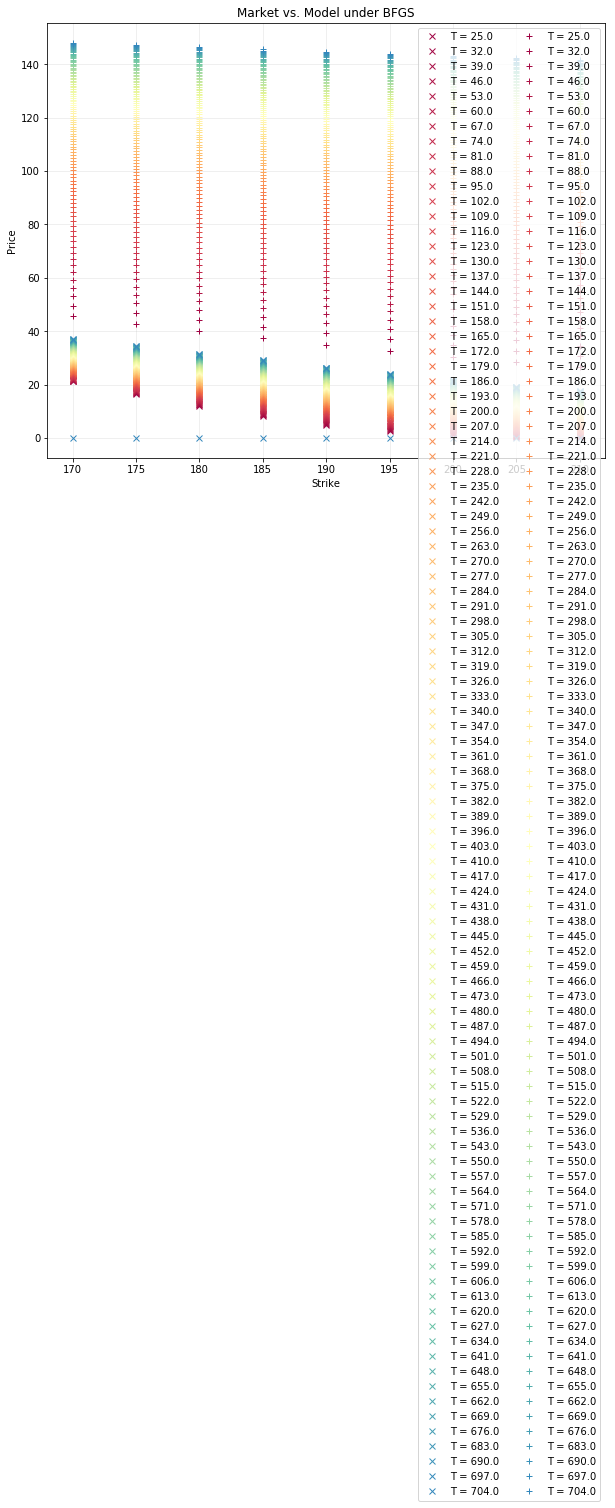

In [29]:

# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
for i in range(len(maturities)):
    plt.plot(strikes, marketPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices_BFGS[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model under BFGS')
#plt.savefig('MarketvsModel_BFGS.png')
plt.show() 


### Evaluate which Optimization yields best results: Loss Function

In [30]:
# set 1: Brute-Force vs. Nelder-Mead
params_BF = [0.6, 0.012, 0.0425, 0.31]
params_NM = [ 0.1962264,   0.00188337, -0.00550409  ,0.43405691]

In [31]:
iArray = []
rmseArray = []
rmseMin = 1e10
 
for i in mfc.myRange(-0.5, 1.5, 0.05):
    
    params = i*np.array(params_BF) + (1.0-i)*np.array(params_NM)
    print('')
    print(i)
    print(params)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)


-0.5
[-0.0056604  -0.00317495 -0.02950614  0.49608537]

-0.45
[ 0.01452828 -0.00266911 -0.02710593  0.48988252]

-0.4
[ 0.03471696 -0.00216328 -0.02470573  0.48367967]

-0.35000000000000003
[ 0.05490564 -0.00165745 -0.02230552  0.47747683]

-0.30000000000000004
[ 0.07509432 -0.00115162 -0.01990532  0.47127398]

-0.25000000000000006
[ 0.095283   -0.00064579 -0.01750511  0.46507114]

-0.20000000000000007
[ 1.15471680e-01 -1.39956000e-04 -1.51049080e-02  4.58868292e-01]

-0.15000000000000008
[ 1.35660360e-01  3.65875500e-04 -1.27047035e-02  4.52665447e-01]

-0.10000000000000007
[ 0.15584904  0.00087171 -0.0103045   0.4464626 ]

-0.05000000000000007
[ 0.17603772  0.00137754 -0.00790429  0.44025976]

-6.938893903907228e-17
[ 0.1962264   0.00188337 -0.00550409  0.43405691]

0.04999999999999993
[ 0.21641508  0.0023892  -0.00310389  0.42785406]

0.09999999999999994
[ 0.23660376  0.00289503 -0.00070368  0.42165122]

0.14999999999999994
[0.25679244 0.00340086 0.00169652 0.41544837]

0.199999999

In [ ]:
#optimal results are:

#[ 0.1962264   0.00188337 -0.00550409  0.43405691]
#NM is better

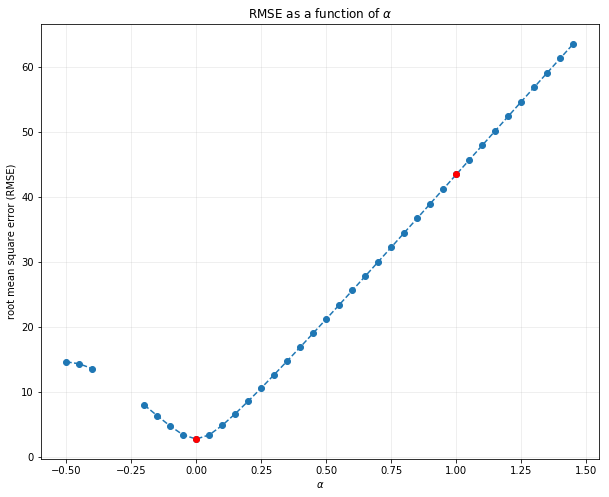

In [32]:
fig = plt.figure(figsize=(10,8))
plt.plot(iArray, rmseArray, 'o--')
plt.plot(iArray[10], rmseArray[10], 'ro')
plt.plot(iArray[30], rmseArray[30], 'ro')
plt.grid(alpha=0.25)
plt.xlabel('$\\alpha$')
plt.ylabel('root mean square error (RMSE)')
plt.title('RMSE as a function of $\\alpha$')
#plt.savefig('NelderMeadvsBruteForce.png')
plt.show()

***Concludes that NM Parameters yield better result ***

In [33]:
# set 2: Brute-Force vs. BFGS
params_BF = [0.6, 0.012, 0.0425, 0.31]
params_BFGS = [1.1   , 0.022 , 0.0525, 0.41  ]

In [34]:
iArray = []
rmseArray = []
rmseMin = 1e10
 
for i in mfc.myRange(-0.5, 1.5, 0.1):
    
    params = i*np.array(params_BF) + (1.0-i)*np.array(params_BFGS)
    print('')
    print(i)
    print(params)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)


-0.5
[1.35   0.027  0.0575 0.46  ]

-0.4
[1.3    0.026  0.0565 0.45  ]

-0.30000000000000004
[1.25   0.025  0.0555 0.44  ]

-0.20000000000000004
[1.2    0.024  0.0545 0.43  ]

-0.10000000000000003
[1.15   0.023  0.0535 0.42  ]

-2.7755575615628914e-17
[1.1    0.022  0.0525 0.41  ]

0.09999999999999998
[1.05   0.021  0.0515 0.4   ]

0.19999999999999998
[1.     0.02   0.0505 0.39  ]

0.3
[0.95   0.019  0.0495 0.38  ]

0.4
[0.9    0.018  0.0485 0.37  ]

0.5
[0.85   0.017  0.0475 0.36  ]

0.6
[0.8    0.016  0.0465 0.35  ]

0.7
[0.75   0.015  0.0455 0.34  ]

0.7999999999999999
[0.7    0.014  0.0445 0.33  ]

0.8999999999999999
[0.65   0.013  0.0435 0.32  ]

0.9999999999999999
[0.6    0.012  0.0425 0.31  ]

1.0999999999999999
[0.55   0.011  0.0415 0.3   ]

1.2
[0.5    0.01   0.0405 0.29  ]

1.3
[0.45   0.009  0.0395 0.28  ]

1.4000000000000001
[0.4    0.008  0.0385 0.27  ]
22.887429269728358
[0.4    0.008  0.0385 0.27  ]


In [ ]:
#optimal results are 
#0.29430818581882634
#[0.4    0.008  0.0385 0.27  ]

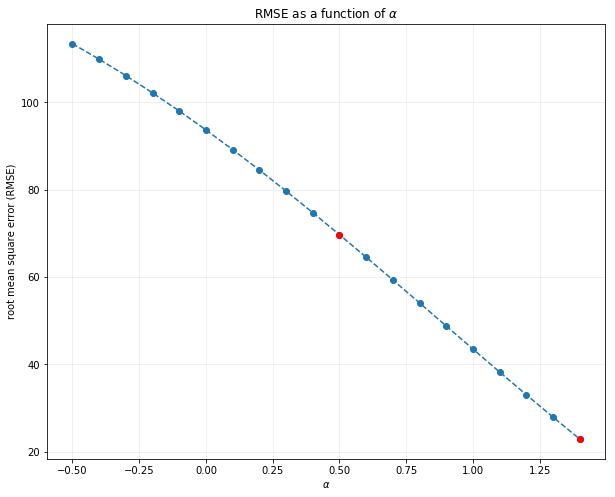

In [37]:
fig = plt.figure(figsize=(10,8))
plt.plot(iArray, rmseArray, 'o--')
plt.plot(iArray[10], rmseArray[10], 'ro')
plt.plot(iArray[19], rmseArray[19], 'ro')
plt.grid(alpha=0.25)
plt.xlabel('$\\alpha$')
plt.ylabel('root mean square error (RMSE)')
plt.title('RMSE as a function of $\\alpha$')
#plt.savefig('NelderMeadvsBruteForce.png')
plt.show()

In [ ]:
#BF yields better result

In [38]:
# set 3: NelderMead vs. BFGS
params_NM = [ 0.1962264,   0.00188337, -0.00550409  ,0.43405691]
params_BFGS = [1.1   , 0.022 , 0.0525, 0.41  ]

In [39]:
iArray = []
rmseArray = []
rmseMin = 1e10
 
for i in mfc.myRange(-0.5, 1.5, 0.1):
    
    params = i*np.array(params_NM) + (1.0-i)*np.array(params_BFGS)
    print('')
    print(i)
    print(params)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)


-0.5
[1.5518868  0.03205832 0.08150204 0.39797154]

-0.4
[1.46150944 0.03004665 0.07570164 0.40037724]

-0.30000000000000004
[1.37113208 0.02803499 0.06990123 0.40278293]

-0.20000000000000004
[1.28075472 0.02602333 0.06410082 0.40518862]

-0.10000000000000003
[1.19037736 0.02401166 0.05830041 0.40759431]

-2.7755575615628914e-17
[1.1    0.022  0.0525 0.41  ]

0.09999999999999998
[1.00962264 0.01998834 0.04669959 0.41240569]

0.19999999999999998
[0.91924528 0.01797667 0.04089918 0.41481138]

0.3
[0.82886792 0.01596501 0.03509877 0.41721707]

0.4
[0.73849056 0.01395335 0.02929836 0.41962276]

0.5
[0.6481132  0.01194168 0.02349796 0.42202845]

0.6
[0.55773584 0.00993002 0.01769755 0.42443415]

0.7
[0.46735848 0.00791836 0.01189714 0.42683984]

0.7999999999999999
[0.37698112 0.0059067  0.00609673 0.42924553]

0.8999999999999999
[2.86603760e-01 3.89503300e-03 2.96319000e-04 4.31651219e-01]

0.9999999999999999
[ 0.1962264   0.00188337 -0.00550409  0.43405691]

1.0999999999999999
[ 1.058490

In [ ]:
#Optimal results are:

#[ 0.1962264   0.00188337 -0.00550409  0.43405691]

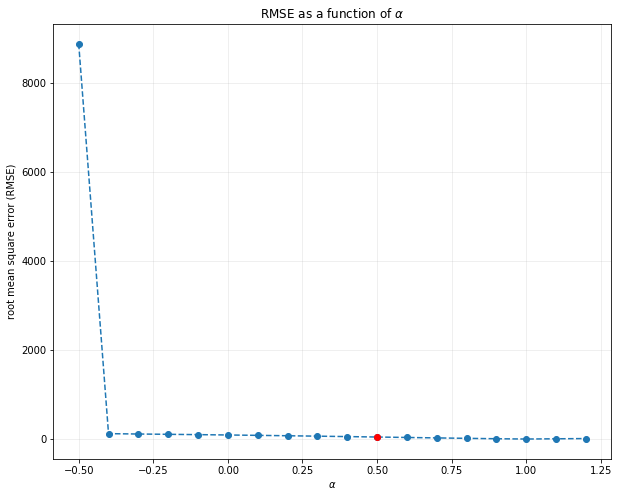

In [40]:
fig = plt.figure(figsize=(10,8))
plt.plot(iArray, rmseArray, 'o--')
plt.plot(iArray[10], rmseArray[10], 'ro')
plt.plot(iArray[19], rmseArray[19], 'ro')
plt.grid(alpha=0.25)
plt.xlabel('$\\alpha$')
plt.ylabel('root mean square error (RMSE)')
plt.title('RMSE as a function of $\\alpha$')
#plt.savefig('NelderMeadvsBruteForce.png')
plt.show()

In [ ]:
#NM is the best

# II. Local Volatility Surface

** Explicitly compute local volatility for each point in our grid **

## 1. Calculate Finite differences

In [41]:
deltaK = 5
deltaT = 1/52 

In [42]:

params_NM = [ 0.1962264,   0.00188337, -0.00550409  ,0.43405691]
lenT = len(maturities)
lenK = len(strikes)
modelPrices = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities_years[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params_NM, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices[i,j] = cT_km[0]

In [43]:
modelPrices.shape

(98, 9)

In [44]:
# v_j,k Option prices for all points on the grid
modelPrices_df = pd.DataFrame(modelPrices, columns = strikes)
modelPrices_df.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,20.389553,15.697046,11.388191,7.690023,4.781759,2.716185,1.402391,0.656665,0.278867
1,20.597694,16.010446,11.828405,8.235186,5.364751,3.253046,1.830233,0.954130,0.460961
2,20.820098,16.325353,12.244638,8.730101,5.886775,3.740580,2.234895,1.254470,0.661689
3,21.050622,16.637076,12.639637,9.186957,6.364207,4.190793,2.619122,1.552696,0.873405
4,21.285426,16.943535,13.016099,9.613728,6.807237,4.611530,2.985554,1.846562,1.091444


#### dC/dT for every point on the grid

In [45]:
dcdT = (modelPrices_df.diff()/deltaT).shift(-1)
dcdT.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,10.823332,16.296793,22.891101,28.348477,30.315613,27.916794,22.247786,15.468154,9.468905
1,11.565030,16.375145,21.644113,25.735594,27.145245,25.351750,21.042469,15.617703,10.437873
2,11.987238,16.209636,20.539960,23.756489,24.826483,23.411102,19.979770,15.507758,11.009230
3,12.209828,15.935855,19.576052,22.192086,23.037541,21.878315,19.054462,15.280994,11.338023
4,12.305730,15.617088,18.733407,20.916100,21.604309,20.628862,18.247004,15.003576,11.514655


In [19]:
(16.010738 - 15.703254)/ deltaT

15.989168000000028

#### dC/dK for every point on the grid

In [46]:
dcdK = (modelPrices_df.diff(axis=1, periods = 2)/(2*deltaK)).shift(-1,axis=1)
dcdK.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,NaN,-0.900136,-0.800702,-0.660643,-0.497384,-0.337937,-0.205952,-0.112352,NaN
1,NaN,-0.876929,-0.777526,-0.646365,-0.498214,-0.353452,-0.229892,-0.136927,NaN
2,NaN,-0.857546,-0.759525,-0.635786,-0.498952,-0.365188,-0.248611,-0.157321,NaN
3,NaN,-0.841098,-0.745012,-0.627543,-0.499616,-0.374509,-0.263810,-0.174572,NaN
4,NaN,-0.826933,-0.732981,-0.620886,-0.500220,-0.382168,-0.276497,-0.189411,NaN


In [22]:
(11.277736 - 20.440630)/(2*deltaK)

-0.9162893999999998

In [47]:
# For vol surface calculation
dcdK_v = dcdK
for i in modelPrices_df.columns:
    dcdK_v[i] = i * dcdK[i]*(r-q)

In [48]:
dcdK_v.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,NaN,-3.071715,-2.810465,-2.383271,-1.842807,-1.285005,-0.803213,-0.449129,NaN
1,NaN,-2.992520,-2.729116,-2.331763,-1.845883,-1.344001,-0.896577,-0.547366,NaN
2,NaN,-2.926376,-2.665933,-2.293599,-1.848618,-1.388627,-0.969583,-0.628889,NaN
3,NaN,-2.870249,-2.614992,-2.263861,-1.851079,-1.424069,-1.028858,-0.697850,NaN
4,NaN,-2.821908,-2.572762,-2.239847,-1.853314,-1.453195,-1.078338,-0.757170,NaN


In [25]:
(r-q)*175*(-0.916289)

-3.1268362125

#### d2C/dK2 for every point on the grid

In [49]:
# For d2C/dK2: - 2*v_j,k
modelPrices_df_neg2 = modelPrices_df*(-2)

In [50]:
modelPrices_df_neg2.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,-40.779105,-31.394092,-22.776382,-15.380046,-9.563517,-5.432369,-2.804781,-1.313330,-0.557733
1,-41.195387,-32.020892,-23.656809,-16.470372,-10.729502,-6.506092,-3.660465,-1.908259,-0.921922
2,-41.640196,-32.650705,-24.489275,-17.460203,-11.773550,-7.481159,-4.469791,-2.508940,-1.323379
3,-42.101244,-33.274153,-25.279274,-18.373914,-12.728415,-8.381586,-5.238244,-3.105393,-1.746811
4,-42.570852,-33.887070,-26.032199,-19.227456,-13.614474,-9.223060,-5.971108,-3.693123,-2.182888


In [51]:
d2cdK2 = pd.DataFrame()
for i in range(len(modelPrices_df.columns)): 
    try:
        d2cdK2[modelPrices_df.columns[i]] = (modelPrices_df[modelPrices_df.columns[i-1]] + modelPrices_df[modelPrices_df.columns[i+1]] -2* modelPrices_df[modelPrices_df.columns[i]])/(deltaK**2)
    except: 
        d2cdK2[modelPrices_df.columns[i]] = np.repeat(np.nan, len(modelPrices_df))

In [52]:
modelPrices_df.shape == modelPrices_df_neg2.shape == d2cdK2.shape

True

In [53]:
d2cdK2[modelPrices_df.columns[0]] = np.repeat(np.nan, len(modelPrices_df))
d2cdK2.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,NaN,0.015346,0.024427,0.031596,0.033708,0.030071,0.022723,0.014717,NaN
1,NaN,0.016208,0.023553,0.028911,0.030349,0.027556,0.021868,0.015317,NaN
2,NaN,0.016561,0.022647,0.026848,0.027885,0.025620,0.021010,0.015506,NaN
3,NaN,0.016644,0.021790,0.025197,0.025973,0.024070,0.020210,0.015485,NaN
4,NaN,0.016578,0.021003,0.023835,0.024431,0.022789,0.019479,0.015355,NaN


In [349]:
(15.627181 - 2* 17.977095 + 20.385484)/(deltaK**2)

0.00935600000000079

In [54]:
# For vol surface calculation
d2cdK2_v = d2cdK2
for i in modelPrices_df.columns:
    d2cdK2_v[i] = i**2 * d2cdK2[i] * 1/2

In [55]:
d2cdK2_v.head()

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,NaN,234.986700,395.724952,540.689071,608.422538,571.728647,454.454928,309.242543,NaN
1,NaN,248.188977,381.557040,494.745430,547.802920,523.902134,437.368418,321.856217,NaN
2,NaN,253.593736,366.883727,459.443273,503.328481,487.108747,420.207106,325.815240,NaN
3,NaN,254.864975,353.004127,431.187446,468.820007,457.625463,404.196654,325.386630,NaN
4,NaN,253.853997,340.241484,407.880501,440.985774,433.280301,389.587179,322.646897,NaN


In [366]:
0.009356*172.5**2*0.5

139.1997375

In [56]:
dcdT.shape == modelPrices_df.shape == dcdK_v.shape == d2cdK2_v.shape

True

## 2. Calculate Local Volatility Surface

In [57]:
# Vol Surface 
vol_surface = ((dcdT + dcdK_v + q*modelPrices_df)/d2cdK2_v)**0.5

In [58]:
vol_surface

,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0
0,NaN,0.237937,0.225583,0.219302,0.216419,0.215882,0.217262,0.220404,NaN
1,NaN,0.232903,0.222998,0.217688,0.215017,0.214140,0.214668,0.216421,NaN
2,NaN,0.229569,0.221100,0.216356,0.213800,0.212718,0.212760,0.213742,NaN
3,NaN,0.227137,0.219606,0.215229,0.212741,0.211524,0.211255,0.211759,NaN
4,NaN,0.225250,0.218378,0.214258,0.211815,0.210500,0.210017,0.210198,NaN
5,NaN,0.223722,0.217339,0.213408,0.210996,0.209609,0.208970,0.208921,NaN
6,NaN,0.222449,0.216442,0.212658,0.210268,0.208823,0.208067,0.207845,NaN
7,NaN,0.221363,0.215656,0.211987,0.209615,0.208125,0.207275,0.206920,NaN
8,NaN,0.220422,0.214959,0.211385,0.209025,0.207498,0.206573,0.206111,NaN
9,NaN,0.219594,0.214335,0.210839,0.208490,0.206931,0.205945,0.205396,NaN


In [59]:
vol_surface_new = vol_surface[[175.0, 180.0,185.0,190.0,195.0,200.0,205.0]]
#pd.DataFrame.to_csv(vol_surface)

In [60]:
vol_surface_new = vol_surface_new.loc[np.arange(0,97)]

In [107]:
vol_surface_new.to_csv('heston_call.csv')


In [61]:
import plotly
plotly.tools.set_credentials_file(username='lisayhe', api_key='FioDIUbTjZMAu76NCdei')

In [62]:

data = [
    go.Surface(
        z=vol_surface_new.as_matrix()
    )
]
layout = go.Layout(
    title='Apple VGSSD Call Vol Surface',
    autosize=True,
    
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Apple_VGSSD_Call', auto_open=True)